In [1]:
!pip install openpyxl
!pip install hazm

     |████████████████████████████████| 243 kB 863 kB/s 
     |████████████████████████████████| 316 kB 867 kB/s 
     |████████████████████████████████| 233 kB 3.5 MB/s 
     |████████████████████████████████| 1.4 MB 3.5 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394468 sha256=d3fb4bbf0f30f86e35bfa4054c4b6799a919fa1cd862d6103ad988b3852bfd7b
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=169442 sha256=dce93f5b174b564f5283a2a32f952f4b09889afee75c5ff09dd40b8a178ee0c2
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into acco

In [2]:
import numpy as np 
import pandas as pd
from hazm import *
import re
from sklearn.feature_extraction.text import CountVectorizer

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/persian-digikala-reviwes/2-p9vcb5bb.xlsx


In [3]:
#read data
dirty_df = pd.read_excel('../input/persian-digikala-reviwes/2-p9vcb5bb.xlsx')
dirty_df.shape

(100000, 12)

In [4]:
normalizer = Normalizer()

print(dirty_df['comment'][4])
dirty_df = dirty_df.dropna()

dirty_df['comment'] = dirty_df['comment'].apply(lambda x:normalizer.normalize(x)) # Normaliz Text
dirty_df['comment'] = dirty_df['comment'].apply(lambda x: re.sub('[0-9]+', ' ', x))
#dirty_df['comment'] = dirty_df['comment'].apply(lambda x:sent_tokenize(x))        # Sent tokeniz
#dirty_df['comment'] = dirty_df['comment'].apply(lambda x:word_tokenize(str(x)))        # Tokenize word

print('------------------------------------------------')
print(dirty_df['comment'][4])

اگر ظرفیتش براتون کافیه حتما بخرید._x000D_
یه شارژر 5 ولت 2 آمپر براش تهیه کنید تا سریعتر شارژ شه. خود برند شیائومی شارژر های خوبی داره._x000D_
ظرافتش خوبه و وزن و ضخامت کمی داره و مثل یه موبایل راحت حمل میشه. البته پیشنهاد من ظرفیت های بالاتر هست. چون این مدل بسته به ظرفیت باتری گوشیتون صرفا به اندازه یک الی 2 بار شارژ کردن، انرژی ذخیره میکنه.
------------------------------------------------
اگر ظرفیتش براتون کافیه حتما بخرید. _x۰۰۰D_
یه شارژر ۵ ولت ۲ آمپر براش تهیه کنید تا سریعتر شارژ شه. خود برند شیائومی شارژر‌های خوبی داره. _x۰۰۰D_
ظرافتش خوبه و وزن و ضخامت کمی داره و مثل یه موبایل راحت حمل میشه. البته پیشنهاد من ظرفیت‌های بالاتر هست. چون این مدل بسته به ظرفیت باتری گوشیتون صرفا به اندازه یک الی ۲ بار شارژ کردن، انرژی ذخیره میکنه.


In [5]:
#here we keep useful values of'recommend' column in df

#print(dirty_df.columns.values)
print(dirty_df.recommend.unique())

df = dirty_df
df = df[(df['recommend'] == "recommended") | (df['recommend'] == "not_recommended")]
df.shape

['recommended' 'no_idea' '\\N' 'not_recommended']


(15611, 12)

<AxesSubplot:ylabel='Frequency'>

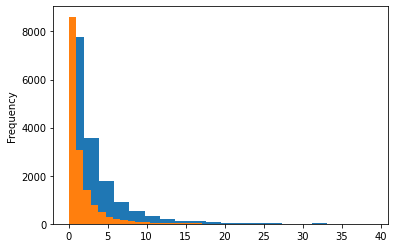

In [6]:
#df['comment'].str.len().plot.hist()
df[df['likes']<40]['likes'].plot.hist(bins=20)
df[df['dislikes']<20]['dislikes'].plot.hist(bins=20)

In [7]:
df = df[((df['likes']/df['dislikes'])>1)&(df['recommend'] == "recommended")
       |((df['recommend'] == "not_recommended")&(df['dislikes']/df['likes']>1))]
df.shape

(7596, 12)

In [8]:
df = df[['recommend','comment']]
df

,recommend,comment
1,recommended,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...
5,recommended,سلام دوستان،، _x۰۰۰D_\nمنم مثه بعضی از دوستان ...
6,recommended,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...
10,recommended,نزدیک به دو ساله که این هارد رو خریدم. استفاده...
12,recommended,افا از وقتی من اینو واسه پسرم خریدم همه بچه‌ها...
...,...,...
99913,not_recommended,شماره ۴۴سفارش دادم قالب آ ن کوچک است اندازه پا...
99924,recommended,با این مبلغ الان یه بستنی هم نمیشه خورد
99941,recommended,سلام _x۰۰۰D_\nمن دو هفته هست این دستگاه رو خری...
99953,recommended,من آیفون ۶ اس پلاس دارم و کاور سیلیکونی هم دار...


In [9]:
#finally some serious stuff
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df['comment'], df['recommend'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['comment'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
xtrain_tfidf.data

array([0.63681414, 0.40394491, 0.25197147, ..., 0.19983383, 0.12309238,
       0.05106552])

In [10]:
clf = linear_model.LogisticRegression()
clf.fit(xtrain_tfidf,train_y)
predictions = clf.predict(xvalid_tfidf)
print ("Accuracy: ",metrics.accuracy_score(predictions, valid_y))

Accuracy:  0.8773038441284887


In [11]:
#an example of negative example
n = 99958
tmp = dirty_df.loc[n,'comment']
tmp2 = pd.Series(normalizer.normalize(tmp))
tmp_tfidf = tfidf_vect.transform(tmp2)
x = clf.predict(tmp_tfidf)

print(dirty_df['comment'][n])
x

خیلی ضعیف بود


array([0])

In [12]:
#an example of negative example
n = 200
tmp = dirty_df.loc[n,'comment']
tmp2 = pd.Series(normalizer.normalize(tmp))
tmp_tfidf = tfidf_vect.transform(tmp2)
x = clf.predict(tmp_tfidf)

print(dirty_df['comment'][n])
x

عالیه سومین تیوپ رو خریدم جوش اصلا نمیاره رنگش تابلو نیست و جذبش خوبه. قبلا هم گفتم عالیه. مخصوصا که قیمتش کمه و من برا پشت دستهامم استفاده میکنم


array([1])